## Simular trayectorias con qutip para hacer ensambles y comparar con ecuación maestra.


10.0%. Run time:   0.00s. Est. time left: 00:00:00:00
20.0%. Run time:   0.71s. Est. time left: 00:00:00:02
30.0%. Run time:   1.43s. Est. time left: 00:00:00:03
40.0%. Run time:   2.14s. Est. time left: 00:00:00:03
50.0%. Run time:   2.88s. Est. time left: 00:00:00:02
60.0%. Run time:   3.60s. Est. time left: 00:00:00:02
70.0%. Run time:   4.33s. Est. time left: 00:00:00:01
80.0%. Run time:   5.07s. Est. time left: 00:00:00:01
90.0%. Run time:   5.79s. Est. time left: 00:00:00:00
100.0%. Run time:   6.51s. Est. time left: 00:00:00:00
Total run time:   7.20s


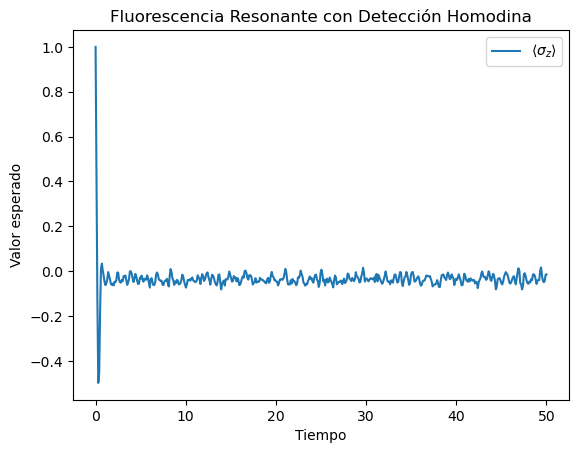

In [2]:
import qutip as qt
import numpy as np
import matplotlib.pyplot as plt

# Parámetros del sistema
Omega = 8.0  # Frecuencia de Rabi
gamma = 1  # Tasa de decaimiento
tlist = np.linspace(0, 50, 500)  # Tiempos de evolución

# Operadores de Pauli
sx = qt.sigmax()
sy = qt.sigmay()
sz = qt.sigmaz()
sp = qt.sigmap()
sm = qt.sigmam()

# Hamiltoniano
H = 0.5 * Omega * (sp + sm)

# Operador de colapso
c_ops = [np.sqrt(gamma) * sm]

# Operador de medición homodina
sc_ops = [sm + sp]

# Estado inicial (átomo en el estado base)
psi0 = qt.basis(2, 0)

# Resolver la ecuación maestra estocástica con detección homodina
result = qt.smesolve(H, psi0, tlist, c_ops=c_ops, sc_ops=sc_ops, e_ops=[sz], heterodyne=False, ntraj=10)

# Graficar la evolución del valor esperado de sigma_z
plt.plot(tlist, result.expect[0], label=r'$\langle \sigma_z \rangle$')
plt.xlabel('Tiempo')
plt.ylabel('Valor esperado')
plt.title('Fluorescencia Resonante con Detección Homodina')
plt.legend()
plt.show()

In [9]:
qt.basis(2, 1)

Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
Qobj data =
[[0.]
 [1.]]

In [15]:
sm

Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=CSR, isherm=False
Qobj data =
[[0. 0.]
 [1. 0.]]